# Here one can see plots of all cross section that we have in the project

##### importing and constant defining section:

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace
%matplotlib inline

import src.coherent_neutrino_nucleus as cn
import src.phys_constants as p_const

Xe_N = 77
Xe_Z = 54
Ar_N = 21
Ar_Z = 18
Ge_N = 41
Ge_Z = 32

Ar_M = 38.964313 * p_const.ATOMIC_MASS_UNIT # MeV
Xe_M = 130.905082 * p_const.ATOMIC_MASS_UNIT # MeV

### Total cross section of the neutrino coherent scattering on the nucleus

$$\nu + _Z^AN \rightarrow \nu + _Z^AN$$


$$ \sigma_{total} = \frac{G^2_F}{4\pi}E_{\nu}^2 Q^2_{W}$$

See "Sterile neutrinos, coherent scattering, and oscillometry measurements with low-temperature bolometers" by Joseph A. Formaggio and etc (PHYSICAL REVIEW D 85, 013009 (2012)) for more information

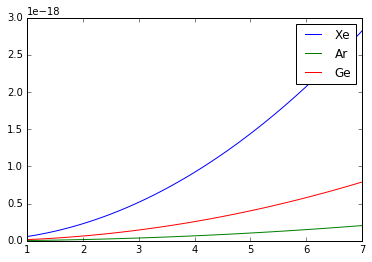

In [2]:
nu_energy = linspace(1, 7, 100) # MeV

cs_xe_total = cn.total_cross_section(Xe_Z, Xe_N, nu_energy) # MeV^(-2)
cs_ar_total = cn.total_cross_section(Ar_Z, Ar_N, nu_energy)
cs_ge_total = cn.total_cross_section(Ge_Z, Ge_N, nu_energy)

plt.plot(nu_energy, cs_xe_total, label='Xe')
plt.plot(nu_energy, cs_ar_total, label='Ar')
plt.plot(nu_energy, cs_ge_total, label='Ge')

plt.legend()

### Differential cross section of the reaction neutrino coherent scattering on the nucleus 

$$ \frac{d\sigma}{dT} = \frac{G^2_F}{4\pi} M_A Q^2_{W} \Big(1 - \frac{M_A T}{2E_{\nu}^2} \Big) F(q^2)^2$$

$$ T_{max} = \frac{E_{\nu}}{1 + \frac{M_A}{2E_{\nu}}} $$

In [6]:
def draw_plots_diff_cs(Z, N, M, nu_energy_list):
    for nu_energy in nu_energy_list:
        nucleus_max_kin = cn.max_kinetic_recoil_nucleus(M, nu_energy) # MeV
        nucleus_kin = linspace(0, nucleus_max_kin, 100)
        diff_cs = cn.differential_cross_section_for_nucleus_kinetic(Z, N, M, nu_energy, nucleus_kin)
        nucleus_kin *= 1000 # keV
        plt.plot(nucleus_kin, diff_cs, label='Enu = %d MeV' % nu_energy)
    plt.legend()

#### Ar:

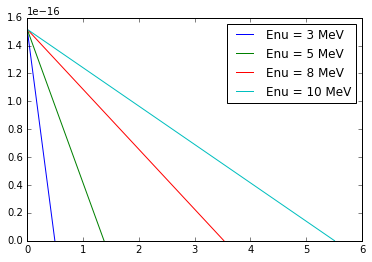

In [8]:
nu_energy_list = [3, 5, 8, 10] # MeV
draw_plots_diff_cs(Ar_Z, Ar_N, Ar_M, nu_energy_list)

#### Xe:

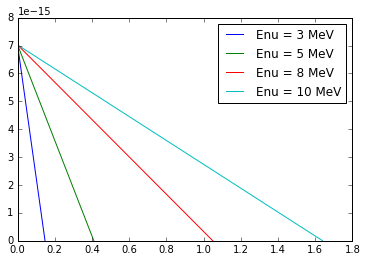

In [9]:
nu_energy_list = [3, 5, 8, 10] # MeV
draw_plots_diff_cs(Xe_Z, Xe_N, Xe_M, nu_energy_list)